<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe-virtual-laboratory](https://jckantor.github.io/cbe-virtual-laboratory);
content is available [on Github](https://github.com/jckantor/cbe-virtual-laboratory.git).*


<!--NAVIGATION-->
< [2.1 Simulation of a Remote Laboratory Experiment Published via MQTT](https://jckantor.github.io/cbe-virtual-laboratory/02.01-SImulation_of_a_Laboratory_Experiment_Published_via_MQTT.html) | [Contents](toc.html) |<p><a href="https://colab.research.google.com/github/jckantor/cbe-virtual-laboratory/blob/master/docs/02.02-Remote_Operation_of_a_Laboratory_Experiment.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe-virtual-laboratory/02.02-Remote_Operation_of_a_Laboratory_Experiment.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 2.2 Remote Operation of a Laboratory Experiment via MQTT

## 2.2.1 Installations

In [1]:
!pip install paho-mqtt

     |████████████████████████████████| 102kB 3.4MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.5.1-cp36-none-any.whl size=61544 sha256=bad3dd55857d971ccfcb4938c41297a53f86ade7baeeee91d82dc4a1973f9629
  Stored in directory: /root/.cache/pip/wheels/75/e2/f5/78942b19b4d135605e58dfe85fba52253b14d636aabf76904b
Successfully built paho-mqtt


## 2.2.2 Remote Operation of a Laboratory Experiment

This cell establishes a connection to two topics on an MQTT server. The 'command' channel is used to publish a message to start a remote experiment for a duration given in seconds. A client is opened to listen to a 'measurement' channel.

Before running this channel, start up up the companion notebook that simulates a remote experiment https://colab.research.google.com/drive/1cj9Y8IlVX2-ZMEMoVWi8G5WDKNr3gkr9?usp=sharing 

## 2.2.3 Version 1

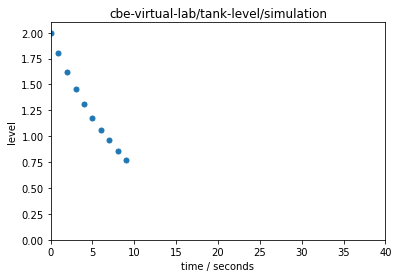

In [14]:
%matplotlib inline
import paho.mqtt.client as mqtt
import paho.mqtt.publish as publish
import time
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

# select experiment duration
duration = 10
expt_topic = "cbe-virtual-lab/tank-level/simulation"

# callbacks
def on_connect(client, userdata, flags, rc):
    print(f"Connected with result code {rc}")
    client.subscribe(expt_topic)

x = []
y = []
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, '.', ms=10)
ax.set_xlim(0, 40)
ax.set_ylim(0, 2.1)
ax.set_xlabel('time / seconds')
ax.set_ylabel('level')
ax.set_title(topic)
line = ax.lines[0]
display.display(fig)

# call back to process message from remote experiment
def on_message(client, userdata, msg):
    #print(msg.topic + " " + msg.payload.decode("utf-8"))
    xdata, ydata = [float(i) for i in msg.payload.decode("utf-8").split(',')]
    x.append(xdata)
    y.append(ydata)
    line.set_data(x, y)
    display.clear_output(wait=True)
    display.display(fig)

# setup client
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

# connect to measurement channel
client.connect("mqtt.eclipse.org", 1883, 60)

# tell experiment to start
msg = f'{{"duration": {duration}, "topic": "{topic}"}}'
publish.single("cbe-virtual-lab/command", msg, hostname="mqtt.eclipse.org")

# listen for measurement information
client.loop_start()
time.sleep(duration)
client.loop_stop()

# prevent the plot showing again after completion
plt.close()

<!--NAVIGATION-->
< [2.1 Simulation of a Remote Laboratory Experiment Published via MQTT](https://jckantor.github.io/cbe-virtual-laboratory/02.01-SImulation_of_a_Laboratory_Experiment_Published_via_MQTT.html) | [Contents](toc.html) |<p><a href="https://colab.research.google.com/github/jckantor/cbe-virtual-laboratory/blob/master/docs/02.02-Remote_Operation_of_a_Laboratory_Experiment.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe-virtual-laboratory/02.02-Remote_Operation_of_a_Laboratory_Experiment.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>